In [212]:
# Initiallizing the spark session
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("NYC_Parking_Tickets") \
    .getOrCreate()

In [213]:
# Reading the data
nyc = spark.read.format("csv").option("header", "true").load("/common_folder/nyc_parking/Parking_Violations_Issued_-_Fiscal_Year_2017.csv")
nyc

DataFrame[Summons Number: string, Plate ID: string, Registration State: string, Issue Date: string, Violation Code: string, Vehicle Body Type: string, Vehicle Make: string, Violation Precinct: string, Issuer Precinct: string, Violation Time: string]

In [214]:
# Having a look at the first few rows of the data
nyc.show(5)

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons Number|Plate ID|Registration State|Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Violation Precinct|Issuer Precinct|Violation Time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|    5092469481| GZH7067|                NY|2016-07-10|             7|             SUBN|       TOYOT|                 0|              0|         0143A|
|    5092451658| GZH7067|                NY|2016-07-08|             7|             SUBN|       TOYOT|                 0|              0|         0400P|
|    4006265037| FZX9232|                NY|2016-08-23|             5|             SUBN|        FORD|                 0|              0|         0233P|
|    8478629828| 66623ME|                NY|2017-06-14|            47|             REFG|

In [215]:
# Counting the number of rows
nyc.count()

10803028

In [216]:
# Counting the number of columns
len(nyc.columns)

10

- There are a total of 10 columns present in the dataset.
- A total of 10803028 records are present in the data.

In [217]:
# Printing the schema
nyc.printSchema()

root
 |-- Summons Number: string (nullable = true)
 |-- Plate ID: string (nullable = true)
 |-- Registration State: string (nullable = true)
 |-- Issue Date: string (nullable = true)
 |-- Violation Code: string (nullable = true)
 |-- Vehicle Body Type: string (nullable = true)
 |-- Vehicle Make: string (nullable = true)
 |-- Violation Precinct: string (nullable = true)
 |-- Issuer Precinct: string (nullable = true)
 |-- Violation Time: string (nullable = true)



In [218]:
# Droping duplicates from the data
nyc = nyc.dropDuplicates()
nyc.count()

10803028

In [219]:
# Replacing the space in the column names with underscore
nyc = nyc.toDF(*(i.replace(' ', '_') for i in nyc.columns))
nyc.show(5)

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons_Number|Plate_ID|Registration_State|Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|Violation_Time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|    4628596529| FFV9629|                NY|2016-12-16|            36|             SUBN|       SUBAR|                 0|              0|         0100P|
|    4628733510| FYM4253|                NY|2016-12-22|            36|             4DSD|       CHEVR|                 0|              0|         0100P|
|    4635150288| GUW9906|                NY|2017-06-15|            36|             4DSD|       ACURA|                 0|              0|         0100P|
|    4631812084| HCF7779|                NY|2017-03-15|            36|             SUBN|

In [220]:
# Creating a temprory view to use SQL
nyc.createOrReplaceTempView("nyctable")
spark.sql('Select * from nyctable')

DataFrame[Summons_Number: string, Plate_ID: string, Registration_State: string, Issue_Date: string, Violation_Code: string, Vehicle_Body_Type: string, Vehicle_Make: string, Violation_Precinct: string, Issuer_Precinct: string, Violation_Time: string]

In [221]:
# Checking the total number of tickets issued in each year
ticket_issued_per_year = spark.sql("select year(Issue_Date) as Year_of_issue, count(Summons_Number) as No_of_tickets_issued from nyctable group by Year_of_issue order by Year_of_issue")
ticket_issued_per_year.show(100)

+-------------+--------------------+
|Year_of_issue|No_of_tickets_issued|
+-------------+--------------------+
|         1972|                   2|
|         1973|                   2|
|         1974|                   1|
|         1976|                   1|
|         1977|                   1|
|         1984|                   1|
|         1985|                   1|
|         1990|                   2|
|         1991|                   3|
|         1994|                   1|
|         1996|                   1|
|         1997|                   1|
|         2000|                 185|
|         2001|                   2|
|         2002|                   1|
|         2003|                   1|
|         2004|                   2|
|         2005|                   1|
|         2006|                   8|
|         2007|                  18|
|         2008|                   4|
|         2009|                   3|
|         2010|                  48|
|         2011|                  22|
|

- Tickets have been issued from the year 1972 to 2069.
- Maximum tickets have been issued in the year 2016 and 2017.

In [222]:
# Total number of years where the tickets have been issued
ticket_issued_per_year.count()

55

In [223]:
# Filtering the data for the year 2017 only
# Counting the total number of records for 2017
nyc.createOrReplaceTempView("2017_table")
nyc = spark.sql("select * from 2017_table where year(Issue_Date) = 2017 ")
nyc.count()

5431918

- There are a total of 5431918 tickets issued in the year 2017.

In [224]:
# Distribution of tickets during variuos months of 2017 
nyc.createOrReplaceTempView("2017_table")
monthwise_ticket_2017= spark.sql("SELECT year(Issue_Date) as year,month(Issue_Date) as month,count(*) as Ticket_Frequency FROM 2017_table GROUP BY year(Issue_Date),month(Issue_Date) order by month(Issue_Date)")
monthwise_ticket_2017.show()

+----+-----+----------------+
|year|month|Ticket_Frequency|
+----+-----+----------------+
|2017|    1|          877365|
|2017|    2|          826967|
|2017|    3|          964737|
|2017|    4|          888402|
|2017|    5|         1020244|
|2017|    6|          852187|
|2017|    7|             370|
|2017|    8|             309|
|2017|    9|             367|
|2017|   10|             274|
|2017|   11|             338|
|2017|   12|             358|
+----+-----+----------------+



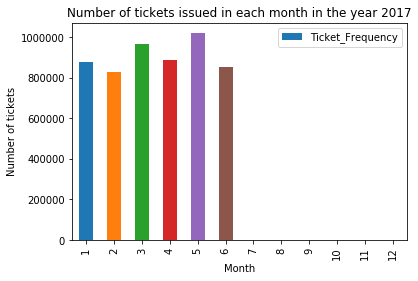

In [225]:
# Plotting number of tickets raised during each month of 2017
Number_of_tickets_raised = monthwise_ticket_2017.toPandas()
import pandas as pd
import matplotlib.pyplot as plt
Number_of_tickets_raised.plot(x= 'month', y='Ticket_Frequency', kind='bar')
plt.title("Number of tickets issued in each month in the year 2017")
plt.xlabel('Month')
plt.ylabel('Number of tickets')
plt.show()

- Maximum number of tickets were issued in the month of May in the year 2017. 

In [226]:
# Grouping the data by Plate_ID 
Plate_Id = spark.sql("Select Plate_ID, count(*) as Ticket_Frequency from 2017_table group by Plate_ID having count(*)>1 order by Ticket_Frequency desc")
Plate_Id.show(5)

+----------+----------------+
|  Plate_ID|Ticket_Frequency|
+----------+----------------+
|BLANKPLATE|            5261|
|   96089MA|             529|
|   96087MA|             528|
|   94905JA|             527|
|   14828MJ|             526|
+----------+----------------+
only showing top 5 rows



In [227]:
# Dropping records where tickets were issued to blank number plates
nyc = nyc[nyc.Plate_ID != 'BLANKPLATE']
nyc.count()

5426657

- Some tickets have been issued to vehicles which have blank number plates.
- 5426657 tickets were issued to vechiles having valid number plates.

In [228]:
# Checking for Null values
from pyspark.sql.functions import isnan, when, count, col
nyc.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in nyc.columns]).show()

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons_Number|Plate_ID|Registration_State|Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|Violation_Time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|             0|       0|                 0|         0|             0|                0|           0|                 0|              0|             0|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+



- Some null values appear in the data but they are not captured as NULL's are stored as strings.

# Examining the data

## Question 1. Find the total number of tickets for the year.

In [229]:
# Calculating the total number of tickets issued 
Total_tickets = spark.sql("Select count(distinct(Summons_Number)) as Number_of_tickets_issued from 2017_table")
Total_tickets.show()

+------------------------+
|Number_of_tickets_issued|
+------------------------+
|                 5431918|
+------------------------+



- Total number of tickets issued are 5426657.

## Question 2. Find out the number of unique states from where the cars that got parking tickets came. 

In [230]:
# Counting the number of states
unique_states = spark.sql("SELECT distinct(Registration_State), Count(*) as Number_of_Records from 2017_table group by Registration_State order by Number_of_Records desc")
unique_states.show()

+------------------+-----------------+
|Registration_State|Number_of_Records|
+------------------+-----------------+
|                NY|          4273951|
|                NJ|           475825|
|                PA|           140286|
|                CT|            70403|
|                FL|            69468|
|                IN|            45525|
|                MA|            38941|
|                VA|            34367|
|                MD|            30213|
|                NC|            27152|
|                TX|            18827|
|                IL|            18666|
|                GA|            17537|
|                99|            16055|
|                AZ|            12379|
|                OH|            12281|
|                CA|            12153|
|                ME|            10806|
|                SC|            10395|
|                MN|            10083|
+------------------+-----------------+
only showing top 20 rows



In [231]:
unique_states.count()

65

- A total of 65 states are their from where tickets are issued.
- The code for one of the states is 99 which appears to be wrong and has to be replace appropriately.

In [232]:
# According to the problem statement column with entry '99' has to be corrected. 
# It has to be replaced with the state having the maximum entries. 
from pyspark.sql.functions import when,lit
nyc = nyc.withColumn('Registration_State',when(nyc["Registration_State"]=="99",lit('NY')).otherwise(nyc["Registration_State"]))

In [233]:
# Count of states after replacing 99
nyc.createOrReplaceTempView("2017_table")
unique_states = spark.sql("SELECT Registration_State, Count(*) as Ticket_Frequency from 2017_table group by Registration_State order by Ticket_Frequency desc")
unique_states.count()

64

- Maximum tickets have been issued for NewYork state.
- Therefore th Numerical entry 99 was replaced by NY.
- There are a total of 64 states from where tickets are issued after making the correction.

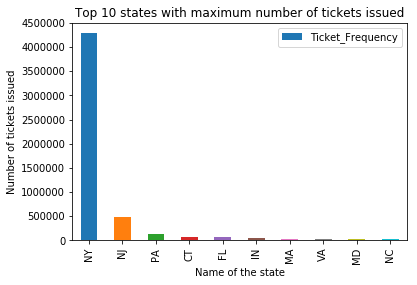

In [234]:
# Plot showing states where maximum number of tickets were issued.
nyc.createOrReplaceTempView("2017_table")
unique_states_plot = unique_states.toPandas()
unique_states_plot.head(10).plot(x='Registration_State', y='Ticket_Frequency', kind='bar')
plt.title("Top 10 states with maximum number of tickets issued")
plt.xlabel('Name of the state')
plt.ylabel('Number of tickets issued')
plt.show()

# Aggregation tasks

## Question 1. How often does each violation code occur? Display the frequency of the top five violation codes.

In [235]:
# Displaying the top 5 violation codes
violation_code = spark.sql("SELECT Violation_Code, Count(*) as Ticket_Frequency from 2017_table group by Violation_code order by Ticket_Frequency desc")
violation_code.show(5)

+--------------+----------------+
|Violation_Code|Ticket_Frequency|
+--------------+----------------+
|            21|          767740|
|            36|          662765|
|            38|          541526|
|            14|          476405|
|            20|          319439|
+--------------+----------------+
only showing top 5 rows



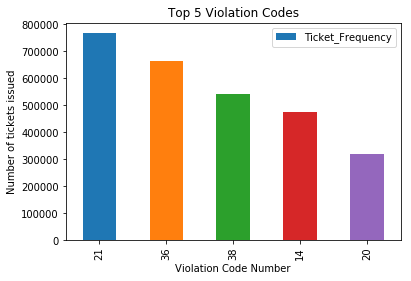

In [236]:
# Top 5 Violation code
violation_code_plot = violation_code.toPandas()
violation_code_plot.head(5).plot(x='Violation_Code', y='Ticket_Frequency', kind='bar')
plt.title("Top 5 Violation Codes")
plt.xlabel('Violation Code Number')
plt.ylabel('Number of tickets issued')
plt.show()

- Maximum number of tickets have been issued for voilation code number 21.

## Question 2. How often does each 'vehicle body type' get a parking ticket? How about the 'vehicle make'?

In [237]:
# Tickets issued based on vechile body type
Body_Type = spark.sql("SELECT Vehicle_Body_Type, count(*) as Ticket_Frequency from 2017_table group by Vehicle_Body_Type order by Ticket_Frequency desc")
Body_Type.show(5)

+-----------------+----------------+
|Vehicle_Body_Type|Ticket_Frequency|
+-----------------+----------------+
|             SUBN|         1882978|
|             4DSD|         1547063|
|              VAN|          723796|
|             DELV|          358924|
|              SDN|          192927|
+-----------------+----------------+
only showing top 5 rows



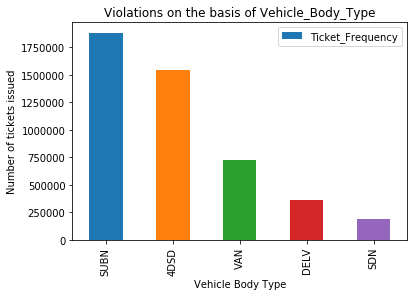

In [238]:
# Plotingt violations on the basis of Vehicle_Body_Type
Body_Type_plot = Body_Type.toPandas()
Body_Type_plot.head(5).plot(x='Vehicle_Body_Type', y='Ticket_Frequency', kind='bar')
plt.title("Violations on the basis of Vehicle_Body_Type")
plt.xlabel('Vehicle Body Type')
plt.ylabel('Number of tickets issued')
plt.show()

- Maximum tickets have been issued to vehicles with suburban bodytypes.

In [239]:
# Tickets issued based on vechile make
vehicle_Make = spark.sql("SELECT Vehicle_Make, count(*) as Ticket_Frequency from 2017_table group by Vehicle_Make order by Ticket_Frequency desc")
vehicle_Make.show(5)

+------------+----------------+
|Vehicle_Make|Ticket_Frequency|
+------------+----------------+
|        FORD|          636527|
|       TOYOT|          605011|
|       HONDA|          538460|
|       NISSA|          461725|
|       CHEVR|          355868|
+------------+----------------+
only showing top 5 rows



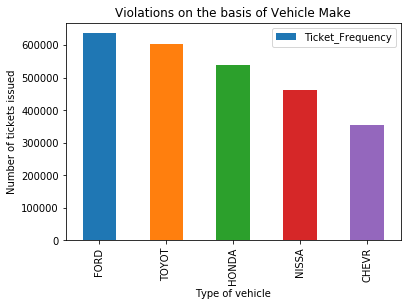

In [240]:
# Plotting violations on the basis of Vehicle_Make
vehicle_Make_plot = vehicle_Make.toPandas()
vehicle_Make_plot.head(5).plot(x='Vehicle_Make', y='Ticket_Frequency', kind='bar')
plt.title("Violations on the basis of Vehicle Make")
plt.xlabel('Type of vehicle')
plt.ylabel('Number of tickets issued')
plt.show()

- Maximum tickets have been issued to FORD type of vehicles.

 ## Question 3. A precinct is a police station that has a certain zone of the city under its command. Find the (5 highest) frequencies of tickets for each of the following:
1. 'Violation Precinct' (This is the precinct of the zone where the violation occurred). Using this, can you draw any insights for parking violations in any specific areas of the city?
2. 'Issuer Precinct' (This is the precinct that issued the ticket.)
Here, you would have noticed that the dataframe has the'Violating Precinct' or 'Issuing Precinct' as '0'. These are erroneous entries. Hence, you need to provide the records for five correct precincts. (Hint: Print the top six entries after sorting.)

In [241]:
# Tickets issued in the zone where the violation occurred
Violation_Precinct = spark.sql("SELECT Violation_Precinct, count(*) as Ticket_Frequency from 2017_table group by Violation_Precinct order by Ticket_Frequency desc")
Violation_Precinct.show(6)

+------------------+----------------+
|Violation_Precinct|Ticket_Frequency|
+------------------+----------------+
|                 0|          925395|
|                19|          274264|
|                14|          203375|
|                 1|          174620|
|                18|          169043|
|               114|          147223|
+------------------+----------------+
only showing top 6 rows



In [242]:
Violation_Precinct_plot = Violation_Precinct.toPandas()
Violation_Precinct_plot.head()

,Violation_Precinct,Ticket_Frequency
0,0,925395
1,19,274264
2,14,203375
3,1,174620
4,18,169043


In [243]:
Violation_Precinct_plot = Violation_Precinct_plot.iloc[1:]

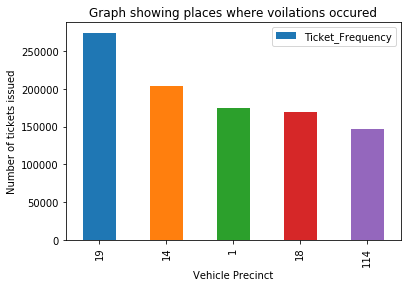

In [244]:
# Plotting tickets issued in the zone where the violation occurred
Violation_Precinct_plot.head(5).plot(x='Violation_Precinct', y='Ticket_Frequency', kind='bar')
plt.title("Graph showing places where voilations occured")
plt.xlabel('Vehicle Precinct')
plt.ylabel('Number of tickets issued')
plt.show()

- Maximum voilations occured in the part of the city having a code 19.

In [245]:
# Police stations which issued the tickets
Issue_precinct = spark.sql("SELECT Issuer_Precinct, count(*) as Ticket_Frequency from 2017_table group by Issuer_Precinct order by Ticket_Frequency desc")  
Issue_precinct.show(6)

+---------------+----------------+
|Issuer_Precinct|Ticket_Frequency|
+---------------+----------------+
|              0|         1077884|
|             19|          266790|
|             14|          200328|
|              1|          168630|
|             18|          162908|
|            114|          143900|
+---------------+----------------+
only showing top 6 rows



In [246]:
Issue_precinct_plot = Issue_precinct.toPandas()
Issue_precinct_plot.head()

,Issuer_Precinct,Ticket_Frequency
0,0,1077884
1,19,266790
2,14,200328
3,1,168630
4,18,162908


In [247]:
Issue_precinct_plot = Issue_precinct_plot.iloc[1:]

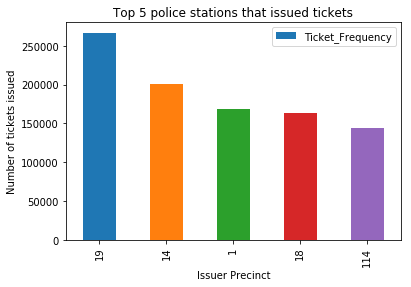

In [248]:
# Police stations which issued the tickets
Issue_precinct_plot.head(5).plot(x='Issuer_Precinct', y='Ticket_Frequency', kind='bar')
plt.title("Top 5 police stations that issued tickets")
plt.xlabel('Issuer Precinct')
plt.ylabel('Number of tickets issued')
plt.show()

- Maximum tickets will be issued in areas where maximum voilations occured ie. areas having code 19, 14, 1, 18 and 114.

## Question 4. Find the violation code frequencies for three precincts that have issued the most number of tickets. Do these precinct zones have an exceptionally high frequency of certain violation codes? Are these codes common across precincts? 

- Maximum number of violation tickets were issued by Precinct 14, 19 and 1 as noticed in the above question.

In [249]:
# Evaluating violation codes for precinct 14
violation_code_freq_precinct14 = spark.sql("select Violation_Code, count(*) as Frequency from 2017_table where Issuer_Precinct = 14 group by Violation_Code order by Frequency desc" )
violation_code_freq_precinct14.show(5)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|    45019|
|            69|    30453|
|            31|    22528|
|            47|    18357|
|            42|    10022|
+--------------+---------+
only showing top 5 rows



In [250]:
# Evaluating violation codes for precinct 19
violation_code_freq_precinct19 = spark.sql("select Violation_Code, count(*) as Frequency from 2017_table where Issuer_Precinct = 19 group by Violation_Code order by Frequency desc" )
violation_code_freq_precinct19.show(5)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            46|    48422|
|            38|    36332|
|            37|    36046|
|            14|    29791|
|            21|    28409|
+--------------+---------+
only showing top 5 rows



In [251]:
# Evaluating violation codes for precinct 1
violation_code_freq_precinct1 = spark.sql("select Violation_Code, count(*) as Frequency from 2017_table where Issuer_Precinct = 1 group by Violation_Code order by Frequency desc" )
violation_code_freq_precinct1.show(5)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            14|    38345|
|            16|    19080|
|            20|    15395|
|            46|    12743|
|            38|     8525|
+--------------+---------+
only showing top 5 rows



- Violation code 14 and 69 are similar for precinct 14 and 1. These also have high number of tickets issued.

## Question 5. Find out the properties of parking violations across different times of the day:
1. Find a way to deal with missing values, if any.
2. The Violation Time field is specified in a strange format. Find a way to make this a time attribute that you can use to divide into groups.
3. Divide 24 hours into six equal discrete bins of time. Choose the intervals as you see fit. For each of these groups, find the three most commonly occurring violations.
4. Now, try another direction. For the three most commonly occurring violation codes, find the most common time of the day (in terms of the bins from the previous part).

In [252]:
# Finding the number of missing values in the violation time column
null_values = spark.sql("SELECT count(*) as Number_of_missing_values from 2017_table WHERE Violation_Time is NULL")
null_values.show()

+------------------------+
|Number_of_missing_values|
+------------------------+
|                       0|
+------------------------+



In [253]:
# Checking the violation time column
nyc.select('Violation_Time').show(10)

+--------------+
|Violation_Time|
+--------------+
|         0710A|
|         0826A|
|         0133P|
|         1220P|
|         0321P|
|         1025A|
|         1130A|
|         0125P|
|         0114P|
|         0843A|
+--------------+
only showing top 10 rows



In [254]:
# Dividing 24 hours into six equal bins of time.
time_bins = spark.sql("SELECT Summons_Number, Violation_Code , Violation_Time, case when substring(Violation_Time,1,2) in ('00','01','02','03','12') and upper(substring(Violation_Time,-1))='A' then 1 when substring(Violation_Time,1,2) in ('04','05','06','07') and upper(substring(Violation_Time,-1))='A' then 2 when substring(Violation_Time,1,2) in ('08','09','10','11') and upper(substring(Violation_Time,-1))='A' then 3 when substring(Violation_Time,1,2) in ('12','00','01','02','03') and upper(substring(Violation_Time,-1))='P' then 4 when substring(Violation_Time,1,2) in ('04','05','06','07') and upper(substring(Violation_Time,-1))='P' then 5 when substring(Violation_Time,1,2) in ('08','09','10','11') and upper(substring(Violation_Time,-1))='P' then 6 else null end as Violation_Time_bin from 2017_table where Violation_Time is not null or (length(Violation_Time)=5 and upper(substring(Violation_Time,-1)) in ('A','P') and substring(Violation_Time,1,2) in ('00','01','02','03','04','05','06','07', '08','09','10','11','12'))")
time_bins.show(10)

+--------------+--------------+--------------+------------------+
|Summons_Number|Violation_Code|Violation_Time|Violation_Time_bin|
+--------------+--------------+--------------+------------------+
|    8170080708|            38|         0125P|                 4|
|    7310311681|            38|         0929A|                 3|
|    8496410791|            14|         0538P|                 5|
|    8562856654|            20|         1001A|                 3|
|    8528055565|            21|         0904A|                 3|
|    8264056544|            37|         1229P|                 4|
|    8484008952|            47|         0102P|                 4|
|    8564805686|            38|         0433P|                 5|
|    4632802384|            36|         0156P|                 4|
|    4631403196|            36|         1155A|                 3|
+--------------+--------------+--------------+------------------+
only showing top 10 rows



In [255]:
time_bins.createOrReplaceTempView("bins_table")
# violation code time count
time_count = spark.sql("SELECT Violation_Time_bin, count(*) count from bins_table group by Violation_Time_bin")
time_count.show()

+------------------+-------+
|Violation_Time_bin|  count|
+------------------+-------+
|              null|     81|
|                 1| 164142|
|                 6| 175957|
|                 3|2161619|
|                 5| 636718|
|                 4|1838573|
|                 2| 449567|
+------------------+-------+



- There are a few records which do not fall in to any bin, it might be ppossible that the time recorded is wrong.
- Maximum voilations are made between 8:00 AM and 12:00 PM

In [256]:
# Most common voilation for the first bin
First_bin = spark.sql("select Violation_Code,count(*) Count_of_violations from bins_table where Violation_Time_bin == 1 group by Violation_Code order by Count_of_violations desc")
First_bin.show(3)

+--------------+-------------------+
|Violation_Code|Count_of_violations|
+--------------+-------------------+
|            21|              36934|
|            40|              25810|
|            78|              15513|
+--------------+-------------------+
only showing top 3 rows



- Most common voilation codes for the first bin which includes time interval from 12:00 AM to 4:00 AM are 21, 40 and 78.

In [257]:
# Most common voilation for the second bin
Second_bin = spark.sql("select Violation_Code,count(*) Count_of_violations from bins_table where Violation_Time_bin == 2 group by Violation_Code order by Count_of_violations desc")
Second_bin.show(3)

+--------------+-------------------+
|Violation_Code|Count_of_violations|
+--------------+-------------------+
|            14|              74095|
|            40|              60609|
|            21|              57876|
+--------------+-------------------+
only showing top 3 rows



- Most common voilation codes for the second bin which includes time interval from 4:00 AM to 8:00 AM are 14, 40 and 21.

In [258]:
# Most common voilation for the third bin
Third_bin = spark.sql("select Violation_Code,count(*) Count_of_violations from bins_table where Violation_Time_bin == 3 group by Violation_Code order by Count_of_violations desc")
Third_bin.show(3)

+--------------+-------------------+
|Violation_Code|Count_of_violations|
+--------------+-------------------+
|            21|             597827|
|            36|             348165|
|            38|             176310|
+--------------+-------------------+
only showing top 3 rows



- Most common voilation codes for the third bin which includes time interval from 8:00 AM to 12:00 PM are 21, 36 and 38.

In [259]:
# Most common voilation for the forth bin
Forth_bin = spark.sql("select Violation_Code,count(*) Count_of_violations from bins_table where Violation_Time_bin == 4 group by Violation_Code order by Count_of_violations desc")
Forth_bin.show(3)

+--------------+-------------------+
|Violation_Code|Count_of_violations|
+--------------+-------------------+
|            36|             286284|
|            38|             240511|
|            37|             166969|
+--------------+-------------------+
only showing top 3 rows



- Most common voilation codes for the forth bin which includes time interval from 12:00 PM to 4:00 PM are 36, 38 and 37.

In [260]:
# Most common voilation for the fifth bin
Fifth_bin = spark.sql("select Violation_Code,count(*) Count_of_violations from bins_table where Violation_Time_bin == 5 group by Violation_Code order by Count_of_violations desc")
Fifth_bin.show(3)

+--------------+-------------------+
|Violation_Code|Count_of_violations|
+--------------+-------------------+
|            38|             102784|
|            14|              75856|
|            37|              70317|
+--------------+-------------------+
only showing top 3 rows



- Most common voilation codes for the fifth bin which includes time interval from 4:00 PM to 8:00 PM are 38, 14 and 37.

In [261]:
# Most common voilation for the sixth bin
Sixth_bin = spark.sql("select Violation_Code,count(*) Count_of_violations from bins_table where Violation_Time_bin == 6 group by Violation_Code order by Count_of_violations desc")
Sixth_bin.show(3)

+--------------+-------------------+
|Violation_Code|Count_of_violations|
+--------------+-------------------+
|             7|              26293|
|            40|              22301|
|            14|              21026|
+--------------+-------------------+
only showing top 3 rows



- Most common voilation codes for the sixth bin which includes time interval from 8:00 PM to 12:00 AM are 7, 40 and 14.

- Most common Voilation Codes are 21, 36 and 38.

In [262]:
# Checking the time bins for the most common voilation codes
time_bin = spark.sql("select Violation_Time_bin, count(*) Violation_count from bins_table where Violation_Code in (21, 36, 38) group by Violation_Time_bin order by Violation_count desc")
time_bin.show(3)

+------------------+---------------+
|Violation_Time_bin|Violation_count|
+------------------+---------------+
|                 3|        1122302|
|                 4|         601432|
|                 5|         116574|
+------------------+---------------+
only showing top 3 rows



- For the most common voilation codes of the day the time bins are 3, 4 and 5.
- Maximum voilations occur between 8:00 AM to 12:00 PM.

## Question 6. Let’s try and find some seasonality in this data:
1. First, divide the year into a certain number of seasons, and find the frequencies of tickets for each season
2. Then, find the three most common violations for each of these seasons.

In [263]:
# Dividing the data into seasons
tickets_seasonality = spark.sql("select Violation_Code , Issuer_Precinct, case when MONTH(Issue_Date) in (04,05,06) then 'Spring' when MONTH(Issue_Date) in (07,08,09) then 'Summer' when MONTH(Issue_Date) in (10,11,12) then 'Autumn' when MONTH(Issue_Date) in (01,02,03) then 'Winter' else 'Season_unknown' end  as Seasons from 2017_table")
tickets_seasonality.show()

+--------------+---------------+-------+
|Violation_Code|Issuer_Precinct|Seasons|
+--------------+---------------+-------+
|            70|             19| Winter|
|            40|            108| Spring|
|            14|             25| Winter|
|            20|            100| Spring|
|            62|            108| Winter|
|            36|              0| Winter|
|            46|             33| Spring|
|            21|              0| Winter|
|            36|              0| Spring|
|            37|             84| Winter|
|            14|             46| Winter|
|             7|              0| Spring|
|            40|             43| Spring|
|            36|              0| Winter|
|            38|             70| Winter|
|            20|            114| Winter|
|            21|            109| Spring|
|             7|              0| Spring|
|            70|            104| Winter|
|            37|             88| Winter|
+--------------+---------------+-------+
only showing top

In [264]:
# Season wise ticket count
tickets_seasonality.createOrReplaceTempView("seasonality_table")
tickets_seasonality_freq = spark.sql("select Seasons, count(*) as Number_of_tickets from seasonality_table group by 1 order by 2 desc")
tickets_seasonality_freq.show()

+-------+-----------------+
|Seasons|Number_of_tickets|
+-------+-----------------+
| Spring|          2758344|
| Winter|          2666304|
| Summer|             1042|
| Autumn|              967|
+-------+-----------------+



In [265]:
# Violations made during Spring season
violation_spring = spark.sql("select Violation_Code, count(*) as Frequency from seasonality_table where Seasons = 'Spring' group by Violation_Code order by Frequency desc" )
violation_spring.show(3)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            21|   393732|
|            36|   314525|
|            38|   254882|
+--------------+---------+
only showing top 3 rows



In [266]:
# Violations made during winter season
violation_winter = spark.sql("select Violation_Code, count(*) as Frequency from seasonality_table where Seasons = 'Winter' group by Violation_Code order by Frequency desc" )
violation_winter.show(3)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            21|   373680|
|            36|   348240|
|            38|   286629|
+--------------+---------+
only showing top 3 rows



In [267]:
# Violations made during Summer season
violation_summer = spark.sql("select Violation_Code, count(*) as Frequency from seasonality_table where Seasons = 'Summer' group by Violation_Code order by Frequency desc" )
violation_summer.show(3)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            21|      228|
|            46|      219|
|            40|      109|
+--------------+---------+
only showing top 3 rows



In [268]:
# Violations made during Autumn season
violation_autumn = spark.sql("select Violation_Code, count(*) as Frequency from seasonality_table where Seasons = 'Autumn' group by Violation_Code order by Frequency desc" )
violation_autumn.show(3)

+--------------+---------+
|Violation_Code|Frequency|
+--------------+---------+
|            46|      219|
|            40|      120|
|            21|      100|
+--------------+---------+
only showing top 3 rows



- Even while evaluating the seasonal variation the maximum type of voilation code recorded are 21, 36 and 38.

## Question 7. The fines collected from all the instances of parking violation constitute a source of revenue for the NYC Police Department. Let’s take an example of estimating this for the three most commonly occurring codes:
Find the total occurrences of the three most common violation codes.
Then, visit the website:
http://www1.nyc.gov/site/finance/vehicles/services-violation-codes.page
It lists the fines associated with different violation codes. They’re divided into two categories: one for the highest-density locations in the city and the other for the rest of the city. For the sake of simplicity, take the average of the two.
Using this information, find the total amount collected for the three violation codes with the maximum tickets. State the code that has the highest total collection.
What can you intuitively infer from these findings?

In [269]:
# Most common violations made
Mostcommon_Violationcodes = spark.sql("select Violation_Code, count(*) as Frequency_of_violation from 2017_table group by Violation_Code order by Frequency_of_violation desc")
Mostcommon_Violationcodes.show(3)

+--------------+----------------------+
|Violation_Code|Frequency_of_violation|
+--------------+----------------------+
|            21|                767740|
|            36|                662765|
|            38|                541526|
+--------------+----------------------+
only showing top 3 rows



In [271]:
# Calculating the fine
from pyspark.sql.functions import when
Applicable_fine=Mostcommon_Violationcodes.withColumn("fine",when(Mostcommon_Violationcodes.Violation_Code == 21, (Mostcommon_Violationcodes.Frequency_of_violation) *65).otherwise((Mostcommon_Violationcodes.Frequency_of_violation)*50))
Applicable_fine.show(3)
print('Total fine collected = ',767740*65+662765*50+541526*50)

+--------------+----------------------+--------+
|Violation_Code|Frequency_of_violation|    fine|
+--------------+----------------------+--------+
|            21|                767740|49903100|
|            36|                662765|33138250|
|            38|                541526|27076300|
+--------------+----------------------+--------+
only showing top 3 rows

Total fine collected =  110117650


- Maximum traffic violations were made from Jan to June ie in the winter and spring season.
- The most common ciolation code was 21.
- Maximum revenue was generated by code 21. 

In [272]:
# Stopping the spark session
spark.stop()